In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# Step 2: Load the Combined Dataset
df = pd.read_csv("customer_clv_dataset.csv")

In [3]:
## Step 3: Drop Unnecessary Columns
# Drop customerID since it's just an identifier
df.drop(['customerID'], axis=1, inplace=True)

In [4]:
##  Step 4: Standardize Service Columns
# Replace 'No internet service' and 'No phone service' with 'No'
cols_with_service = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_with_service:
    df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

In [5]:
## # Step 5: Label Encode Binary Categories
le = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [6]:
# Step 6: One-Hot Encode Multi-Class Columns
# Convert categorical features like Contract, PaymentMethod, InternetService
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)

In [7]:
# Step 7: Save the Cleaned Dataset

df.to_csv("customer_clv_cleaned.csv", index=False)
print("Cleaned dataset saved as 'customer_clv_cleaned.csv'")

Cleaned dataset saved as 'customer_clv_cleaned.csv'


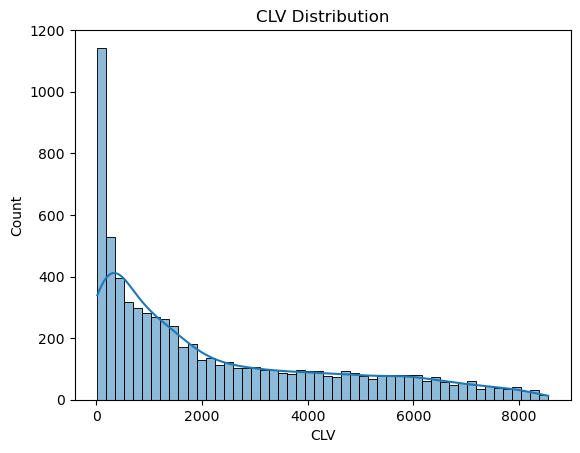

In [8]:
## Check CLV Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CLV'], bins=50, kde=True)
plt.title('CLV Distribution')
plt.show()

### The chart shows how Customer Lifetime Value (CLV) is distributed across all customers:

Most customers have low CLV (less than $1,000), meaning they either churn quickly or spend less over time.

Fewer customers have very high CLV (up to $8,000+), indicating a small group of high-value, long-term customers.

The distribution is right-skewed, meaning high-CLV customers are rare but important.

This pattern is typical in subscription and service businesses like T-Mobile, where a small % of loyal customers drive most of the revenue.

## Business Insight:
Focus your retention and loyalty strategies on the high-CLV segment to maximize long-term profitability.

conclusion : 
The chart shows that most customers don’t spend much money over time, and only a few customers spend a lot.
So:

Many customers are low-value

A small number are very valuable

This means the company should try to keep the high-value customers because they bring in the most money.

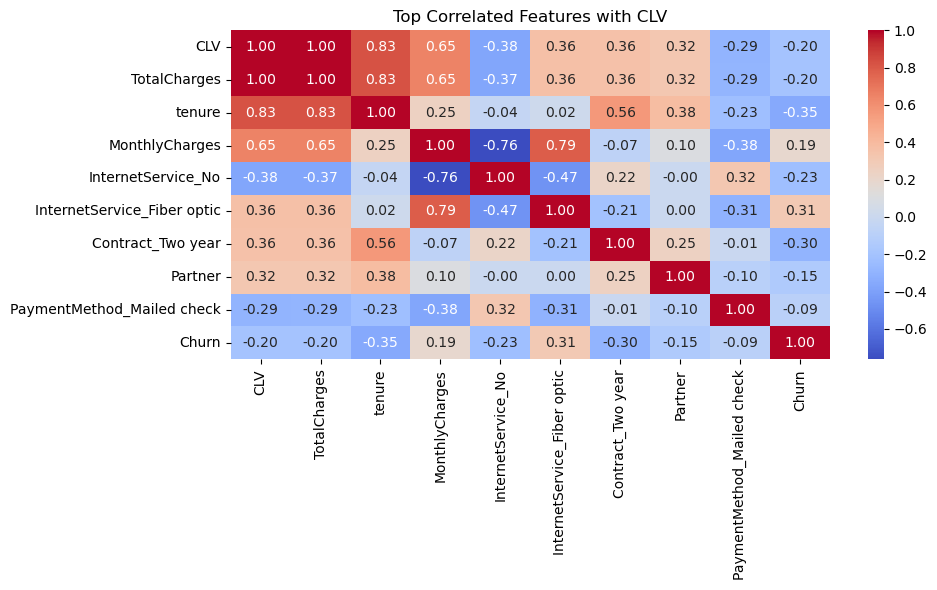

In [9]:
# Pick top 10 correlated with CLV
top_corr_features = df.corr(numeric_only=True)['CLV'].abs().sort_values(ascending=False).head(10).index

# Plot a mini heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with CLV")
plt.tight_layout()
plt.show()

### Heatmap helps identify the most important features for predicting CLV. You should definitely include TotalCharges, tenure, and MonthlyCharges in a model, and consider excluding or deprioritizing features with weak or negative correlations depending on your modeling approach.

### Strongest Positive Relationships with CLV:

TotalCharges (0.83) and tenure (0.83) have the highest correlation with CLV. This means customers who stay longer and spend more over time are more valuable — which is expected.

MonthlyCharges (0.65) also shows a strong positive relationship, indicating customers with higher monthly bills tend to have higher lifetime value.

Moderate Positive Relationships:

Features like InternetService_Fiber optic (0.36), Contract_Two year (0.36), and Partner (0.32) show moderate positive correlations with CLV, meaning these factors contribute to customer value but not as strongly.

Negative Relationships:

InternetService_No (-0.38) and Churn (-0.20) are negatively correlated with CLV. Customers who churn or don’t use internet services contribute less to long-term value.

What’s Not Very Influential:

Features like SeniorCitizen, gender, or certain payment types (not shown here) may have very weak or no meaningful correlation with CLV and can be deprioritized in modeling.

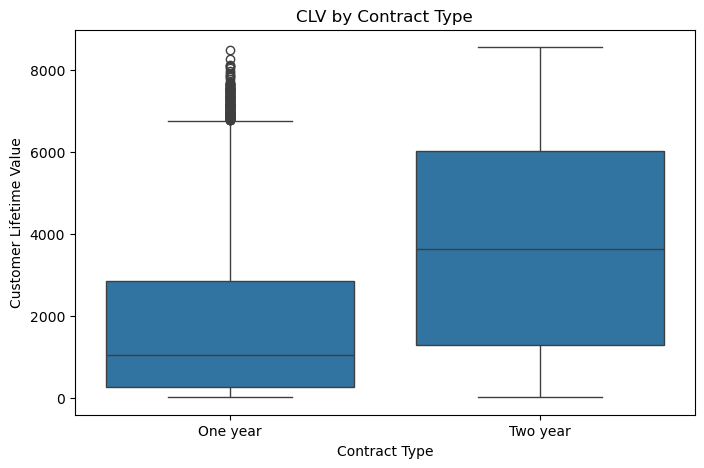

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate the Contract column from dummy variables
df['Contract'] = df[['Contract_One year', 'Contract_Two year']].idxmax(axis=1)
df['Contract'] = df['Contract'].replace({
    'Contract_One year': 'One year',
    'Contract_Two year': 'Two year'
}).fillna('Month-to-month')

# Now create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Contract', y='CLV', data=df)
plt.title('CLV by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Lifetime Value')
plt.show()

### Key Insights:
Two-year contracts → Higher CLV

Customers with two-year contracts have significantly higher median and overall CLV than those with one-year contracts.

The box is higher, and the spread is wider — indicating more revenue potential.

One-year contracts → Lower CLV

The CLV values for one-year contracts are generally lower.

There are many outliers — a few one-year customers are valuable, but most are not.

### Business Implication

Longer contract terms lead to more revenue.

T-Mobile could encourage longer contracts to improve lifetime value.

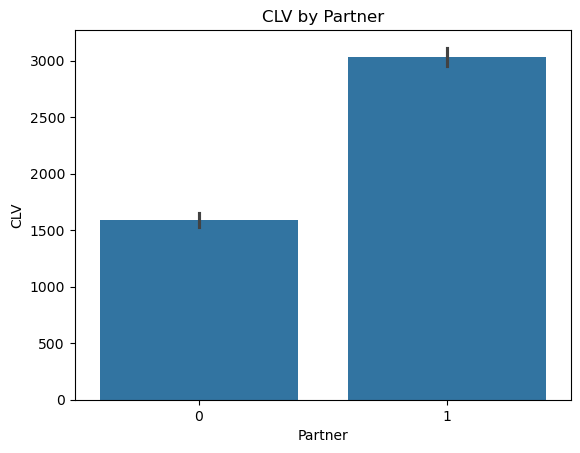

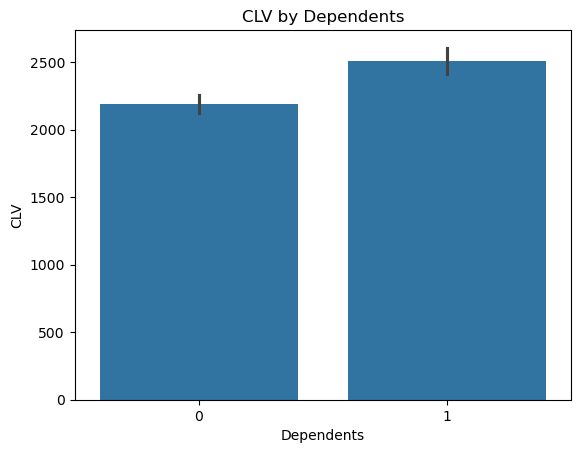

In [12]:
##  Barplot: CLV by Partner/Dependents
sns.barplot(x='Partner', y='CLV', data=df)
plt.title('CLV by Partner')
plt.show()

sns.barplot(x='Dependents', y='CLV', data=df)
plt.title('CLV by Dependents')
plt.show()

## Customers with dependents (like family members or children) also tend to be more valuable to T-Mobile.
Valueable insights
Customers with partners or dependents may be more committed to staying, using family plans, or buying more services.

T-Mobile can target these customers for retention or upselling (like bundling, discounts for families, etc.)

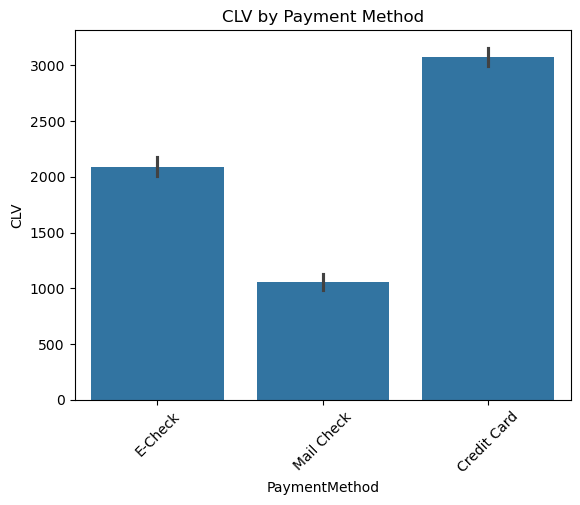

In [13]:
###  CLV by payment method
import seaborn as sns
import matplotlib.pyplot as plt

df['PaymentMethod'] = df[['PaymentMethod_Credit card (automatic)', 
                          'PaymentMethod_Electronic check', 
                          'PaymentMethod_Mailed check']].idxmax(axis=1)

df['PaymentMethod'] = df['PaymentMethod'].replace({
    'PaymentMethod_Credit card (automatic)': 'Credit Card',
    'PaymentMethod_Electronic check': 'E-Check',
    'PaymentMethod_Mailed check': 'Mail Check'
}).fillna('Bank Transfer')

sns.barplot(x='PaymentMethod', y='CLV', data=df)
plt.title('CLV by Payment Method')
plt.xticks(rotation=45)
plt.show()

### This bar chart compares Customer Lifetime Value (CLV) across different payment methods:
a.Credit Card ->  Highest (~3100)->Customers paying by credit card stay longer and spend more
b.E-Check -> Medium (~2100)->These customers are somewhat valuable
c. Mail Check->Lowest (~1100) ->	These customers are less valuable to the company.

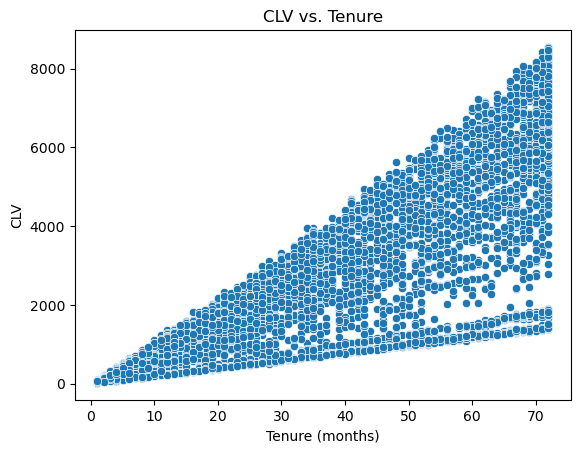

In [14]:
## CLV vs Tenure (Scatter Plot)
sns.scatterplot(x='tenure', y='CLV', data=df)
plt.title('CLV vs. Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('CLV')
plt.show()

### What the Pattern Means:
As tenure increases, CLV also increases.
That means the longer a customer stays, the more money they bring in.

The chart forms a triangle pointing up and right — that’s normal because CLV = tenure × monthly charges (approximately).
## Customers who stay longer with T-Mobile are worth more, so keeping customers for more months leads to higher revenue.

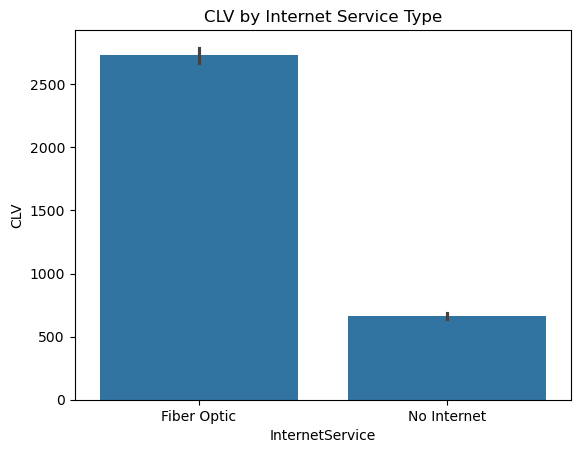

In [16]:
## CLV by Internet Service Type
### Understand how the type of internet service a customer uses affects Customer Lifetime Value (CLV)
df['InternetService'] = df[['InternetService_Fiber optic', 'InternetService_No']].idxmax(axis=1) ## rebuild the orginal InternetService column.(InternetService_Fiber optic and InternetService_No are dummy (one-hot) columns.) -idxmax(axis=1) checks which one is 1 in each row, and returns the column name. 
df['InternetService'] = df['InternetService'].replace({
    'InternetService_Fiber optic': 'Fiber Optic',
    'InternetService_No': 'No Internet'
}).fillna('DSL')

sns.barplot(x='InternetService', y='CLV', data=df)
plt.title('CLV by Internet Service Type')
plt.show()

In [18]:
###save updated CSV file
df.to_csv("customer_clv_feature_engineered.csv", index=False) ###save updated file

##  What This Tells Us:
Customers using Fiber Optic internet are much more valuable to T-Mobile.

Customers with No Internet service have low CLV, meaning they may only use minimal services or leave quickly.

## T-Mobile should promote Fiber Optic service to customers or bundle it with other services. It clearly adds significant value and helps retain customers longer.